In [157]:
import numpy as np
import math
import random
import  matplotlib.pyplot as plt

In [158]:
def f(x):
    return(np.cos(np.pi * x / 2))

variance_theorique = 1/2 - (2/np.pi)**2

In [159]:
def estimateur(N, f):
    echantillon = np.random.uniform(low= 0, high = 1, size = N)
    res = f(echantillon) #on applique f à chaque élément de l'échantillon
    somme = np.sum(res) #on somme les valeurs de f
    variance = 1/N * sum((res[i] - somme/N)**2 for i in range(N)) # on calcule la variance empirique
    return(somme/N, variance ) #moyenne empirique, variance empirique

In [160]:
intervalle = list(range(50, 5000, 10)) #on crée un tableau contenant les valeurs de N
n = len(intervalle)
moyennes = np.zeros(n)
variances = np.zeros(n)
for N in range(n): 
    m, v = estimateur(intervalle[N], f)
    moyennes[N] = m  # stockage des valeurs dans les tableaux
    variances[N] = v

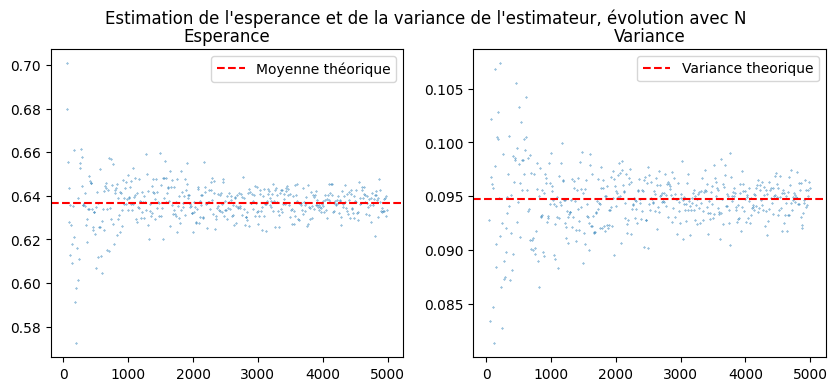

In [161]:
# on plot les résultats
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
figure.suptitle("Estimation de l'esperance et de la variance de l'estimateur, évolution avec N")

ax1.scatter(list(intervalle), moyennes, s = 0.1)
ax1.set_title("Esperance")
ax1.axhline(y=2/np.pi, color='r', linestyle='--', label='Moyenne théorique')
ax1.legend()

ax2.scatter(list(intervalle), variances,  s = 0.1 )
ax2.set_title("Variance")
ax2.axhline(y = variance_theorique, color='r', linestyle='--', label='Variance theorique')

ax2.legend()


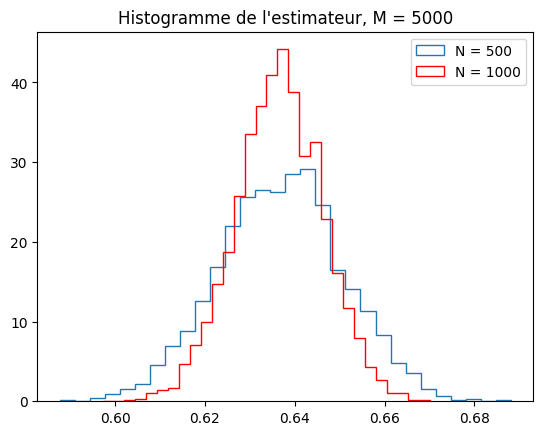

In [186]:
M = 5000 # on calcule M fois l'estimateur 

def un_estimateur(N, M, f):
    moyennes = np.zeros(M)
    for i in range(M): 
        m, v = estimateur(N, f)
        moyennes[i] = m 
    return(moyennes)

N = 500 # pour N = 500
moyennes = un_estimateur(N, M, f)    
plt.hist(moyennes, bins = 30, label = f"N = {N}",  histtype = 'step',  density=True )
N = 1000
moyennes = un_estimateur(N, M, f)
plt.hist(moyennes, bins = 30, color = "r", label = f"N = {N}",  histtype = 'step',  density=True)

plt.title(f"Histogramme de l'estimateur, M = {M}")
plt.legend()

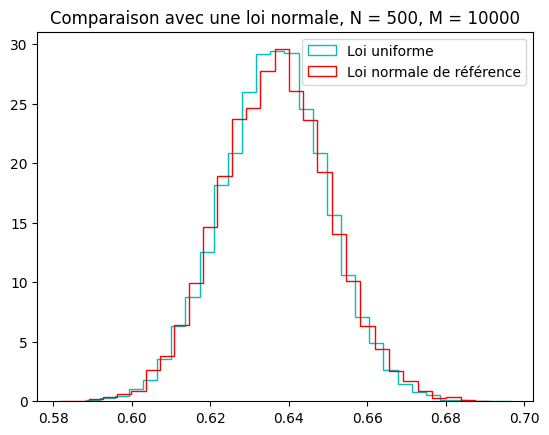

In [187]:
#comparaison avec un histogramme de loi normale
M = 10000

N = 500
moyennes = un_estimateur(N, M, f)
plt.hist(moyennes, bins = 30, color = 'c', label = f"Loi uniforme", histtype = 'step' , density=True)

moyennes = np.random.normal(2/np.pi, np.sqrt(variance_theorique) / np.sqrt(N), M) 
plt.hist(moyennes, bins = 30, color = 'r', label = f"Loi normale de référence", histtype = 'step' , density=True )
plt.legend()
plt.title(f"Comparaison avec une loi normale, N = {N}, M = {M}")
plt.show()

# Developpement limité

In [164]:
def q(x):
    return(1-x**2)

## Calcul numérique intégrale

In [165]:
def echantillonage(a, b, f, n):
    total = 0
    for i in range(n) : 
        total += f(a + i * (b-a)/n)
    return(total / (n *(b-a)))

In [166]:
def fonction_integrale(x):
    return(np.cos(np.pi*x/2) **2 / (1-x**2))

In [167]:
v = echantillonage(0, 1, fonction_integrale, 100000)
print(2/3 * v - (2 / np.pi)**2)
variance_theorique = 2/3 * v - (2 / np.pi)**2

0.000994164266665265


## Méthode du rejet

In [168]:
def q_tilde(x):
    return(3/2 * (1-x**2))

In [169]:
def methode_rejet(q_tilde) :
    x = random.random()
    u = random.random()
    while(q_tilde(x) < 3/2 * u ) : # 3/2 est un majorant
        x = random.random()
        u = random.random() # on reséelctionne x et u
    return(x)

In [170]:
def generate_methode_rejet(N, q_tilde) : 
    res = np.zeros(N)
    for i in range(N):
        res[i] = methode_rejet(q_tilde)
    return(res)

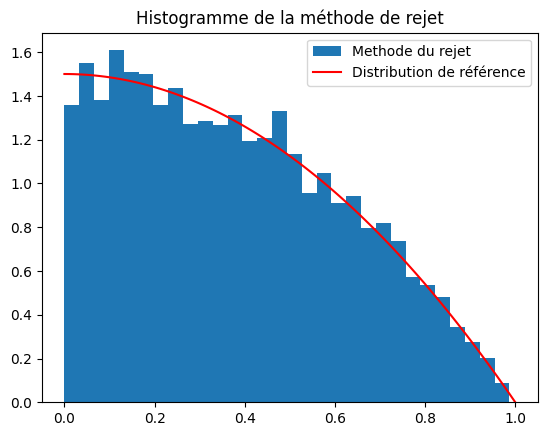

In [181]:
res = generate_methode_rejet(10000, q_tilde)
plt.hist(res, bins = 30, density=True, label = "Methode du rejet")
plt.plot(np.linspace(0, 1, 100), q_tilde(np.linspace(0, 1, 100)), color = 'r', label = "Distribution de référence")
plt.title("Histogramme de la méthode de rejet")
plt.legend()
plt.show()

In [172]:
def estimateur_method_rejet(N, q_tilde, f):
    echantillon = generate_methode_rejet(N, q_tilde)
    res = f(echantillon) / q_tilde(echantillon)
    somme = np.sum(res)
    variance = 1/N * sum((res[i] - somme/N)**2 for i in range(N)) # variance empirique
    return(somme/N, variance ) #moyenne empirique, variance empirique

In [173]:
# genere estimateur pour N dans intervalle
intervalle = list(range(50, 5000, 10))
n = len(intervalle)
moyennes = np.zeros(n)
variances = np.zeros(n)
for N in range(n): 
    m, v = estimateur_method_rejet(intervalle[N],q_tilde, f)
    moyennes[N] =m 
    variances[N] = v

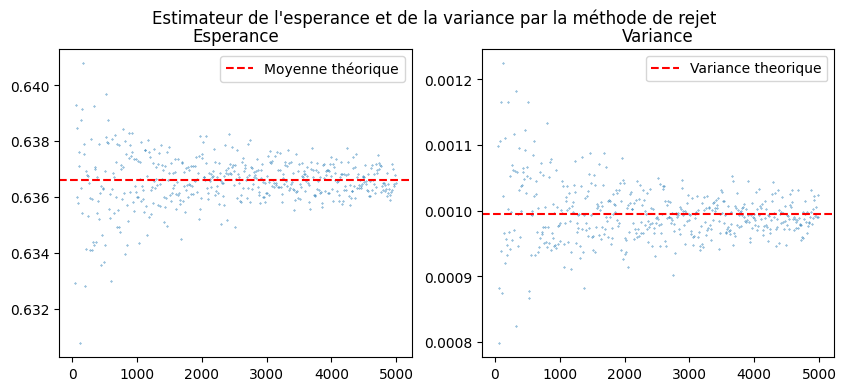

In [174]:
figure, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
figure.suptitle("Estimateur de l'esperance et de la variance par la méthode de rejet")

ax1.scatter(list(intervalle), moyennes, s = 0.1)
ax1.set_title("Esperance")
ax1.axhline(y=2/np.pi, color='r', linestyle='--', label='Moyenne théorique')
ax1.legend()

ax2.scatter(list(intervalle), variances,  s = 0.1 )
ax2.set_title("Variance")
ax2.axhline(y=variance_theorique, color='r', linestyle='--', label='Variance theorique')

ax2.legend()


Text(0.5, 1.0, 'Comparaison de la méthode du rejet et de la méthode uniforme')

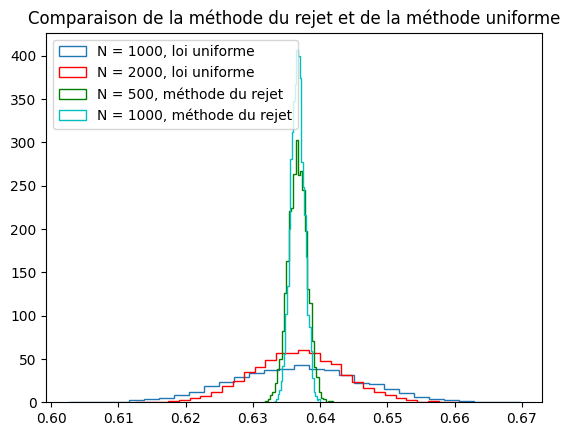

In [183]:
M = 5000
def one_histogram(rejet, M, N, q_tilde, f) :
    moyennes = np.zeros(M)
    for i in range(M): 
        if not rejet :
            m, _ = estimateur(N, f)
        else :
            m, _ = estimateur_method_rejet(N, q_tilde, f)
        moyennes[i] = m 
    return(moyennes)

N = 1000
moyennes = one_histogram(False, M, N,  q_tilde, f) 
plt.hist(moyennes, bins = 30, label = f"N = {N}, loi uniforme", histtype = 'step' , density=True )

N = 2000
moyennes = one_histogram(False, M, N,  q_tilde, f) 
plt.hist(moyennes, bins = 30, color = "r", label = f"N = {N}, loi uniforme", histtype = 'step'  , density=True)

N = 500
moyennes = one_histogram(True, M, N,  q_tilde, f) 
plt.hist(moyennes, bins = 30, color = "g", label = f"N = {N}, méthode du rejet",   histtype = 'step' , density=True )

N = 1000
moyennes = one_histogram(True, M, N,  q_tilde, f) 
plt.hist(moyennes, bins = 30, color = "c", label = f"N = {N}, méthode du rejet",   histtype = 'step'  , density=True)

plt.legend()
plt.title(f"Comparaison de la méthode du rejet et de la méthode uniforme, M = {M}")